In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Aim is to predict the marks of students of the test data

  internet sex  traveltime  studytime  freetime  absences  age   iq  marks
0       no   M           2          2         5         6   18  118  73.13
1      yes   M           2          2         2         7   19  107  67.78
2      yes   M           3          3         3         5   18  108  70.84
3       no   F           3          3         4         9   17  100  66.68
4      yes   M           1          4         3         4   19   96  71.88


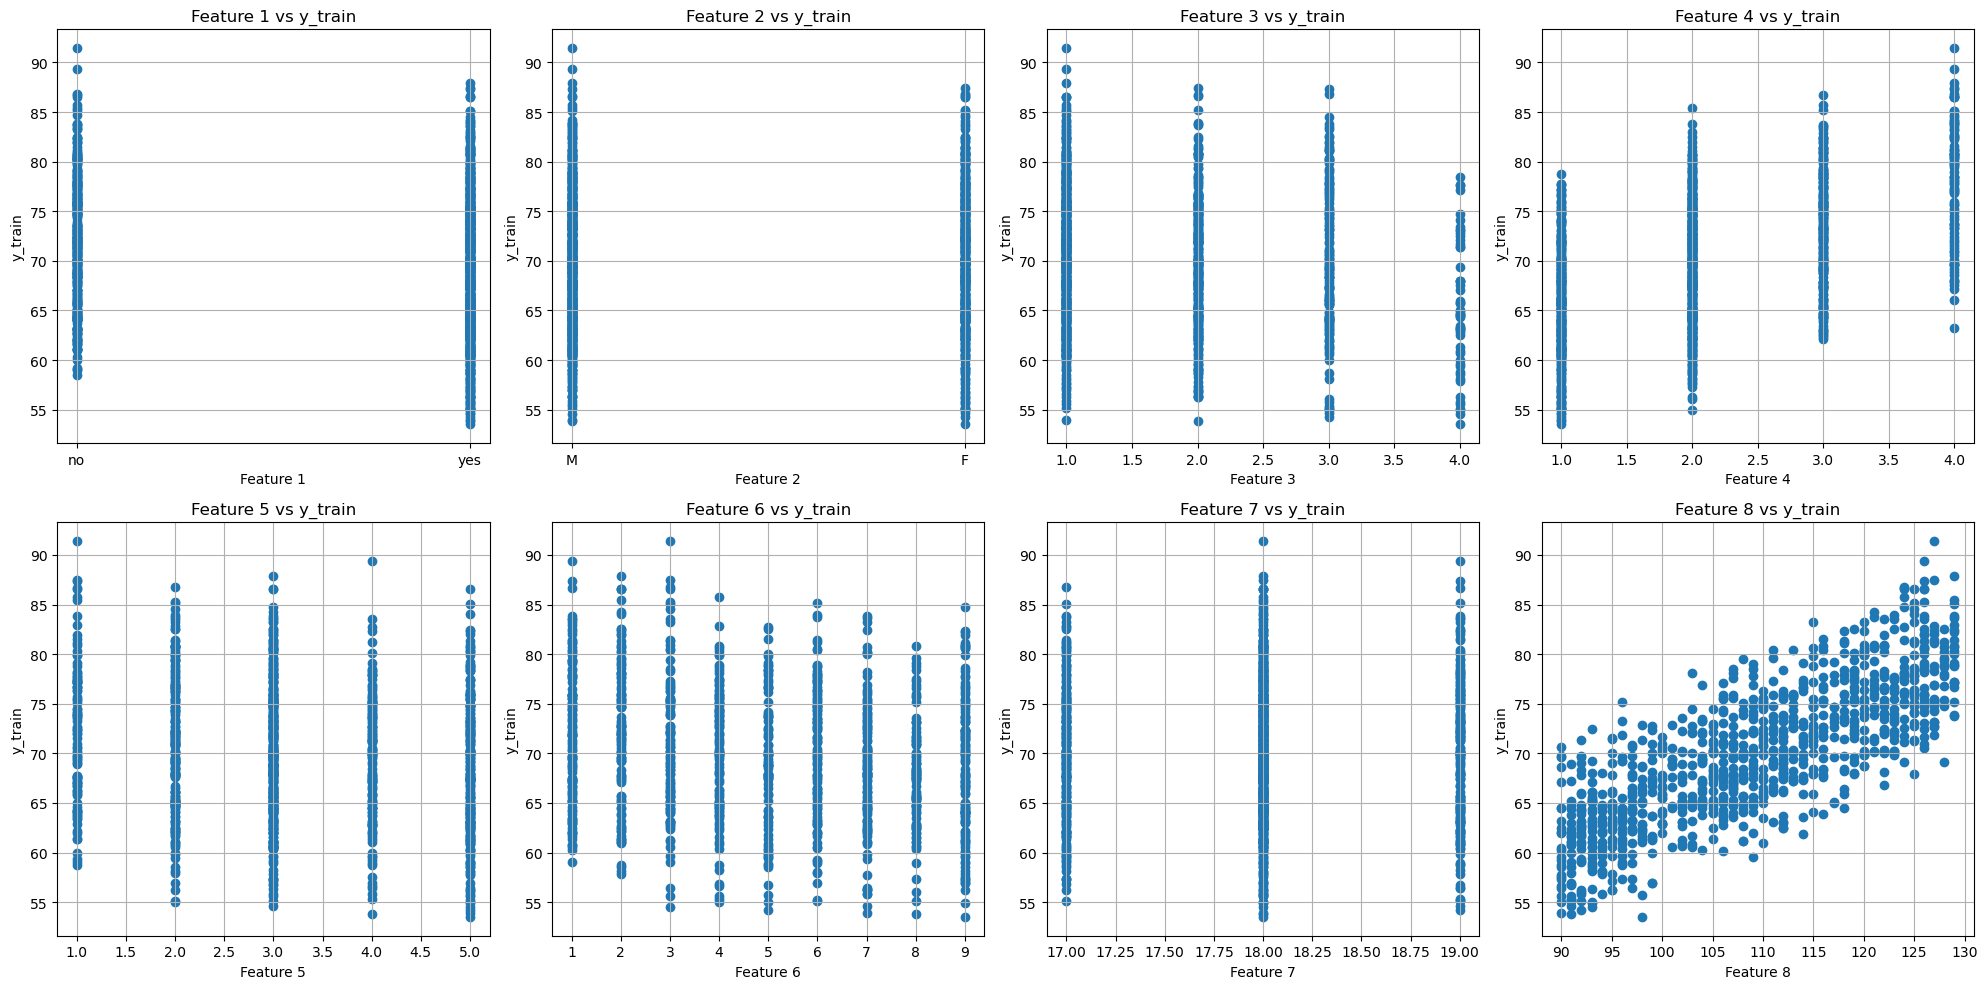

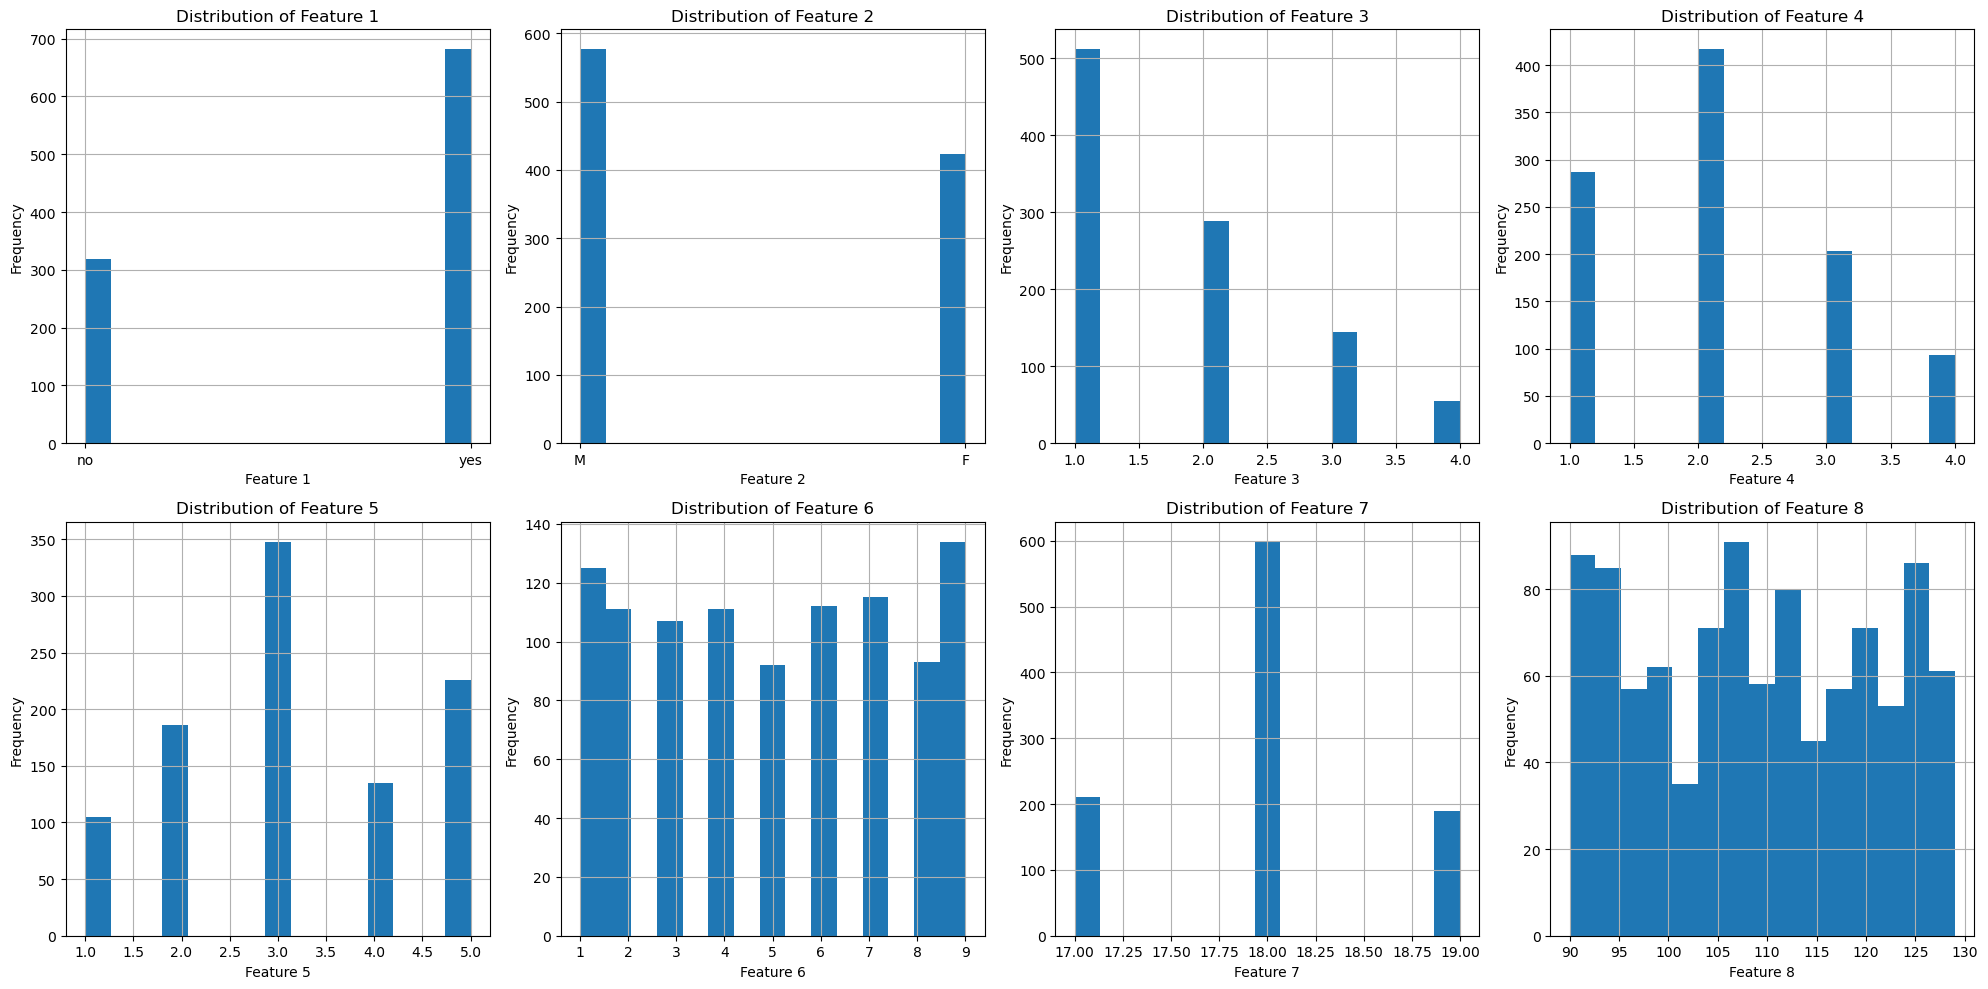

In [183]:
data = pd.read_excel('Training data.xlsx')
print(data.head(5))
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)
#plotting each feature against y_train to understand relationships
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()
for i in range(x_train.shape[1]):
    axes[i].scatter(x_train[:, i], y_train)
    axes[i].set_xlabel(f'Feature {i+1}')
    axes[i].set_ylabel('y_train')
    axes[i].set_title(f'Feature {i+1} vs y_train')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

# Plot histograms for each feature
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()
for i in range(x_train.shape[1]):
    axes[i].hist(x_train[:, i], bins=15)
    axes[i].set_xlabel(f'Feature {i+1}')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Distribution of Feature {i+1}')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

[[0 1 2 ... 18 118 3.933333333333333]
 [1 1 2 ... 19 107 7.642857142857143]
 [1 1 3 ... 18 108 7.2]
 ...
 [1 1 2 ... 17 123 24.6]
 [1 0 1 ... 17 104 13.0]
 [1 1 1 ... 18 128 21.333333333333332]]


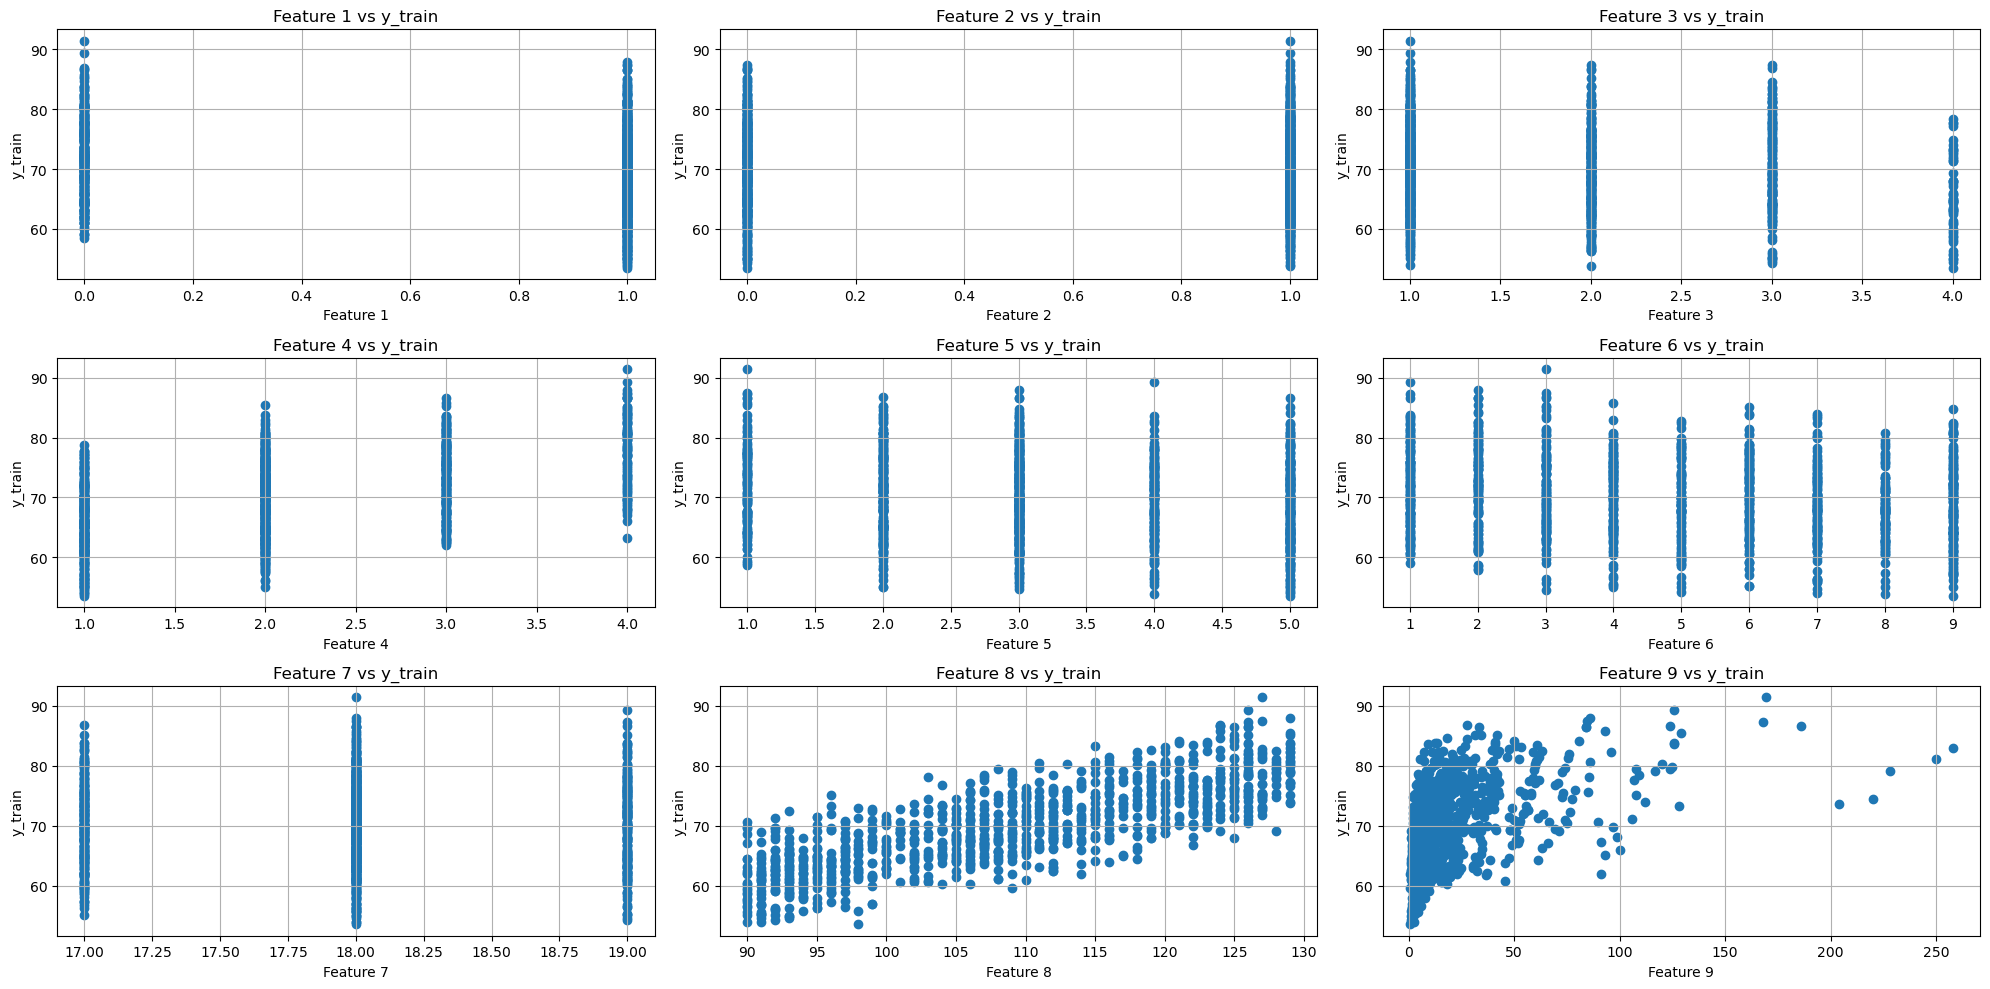

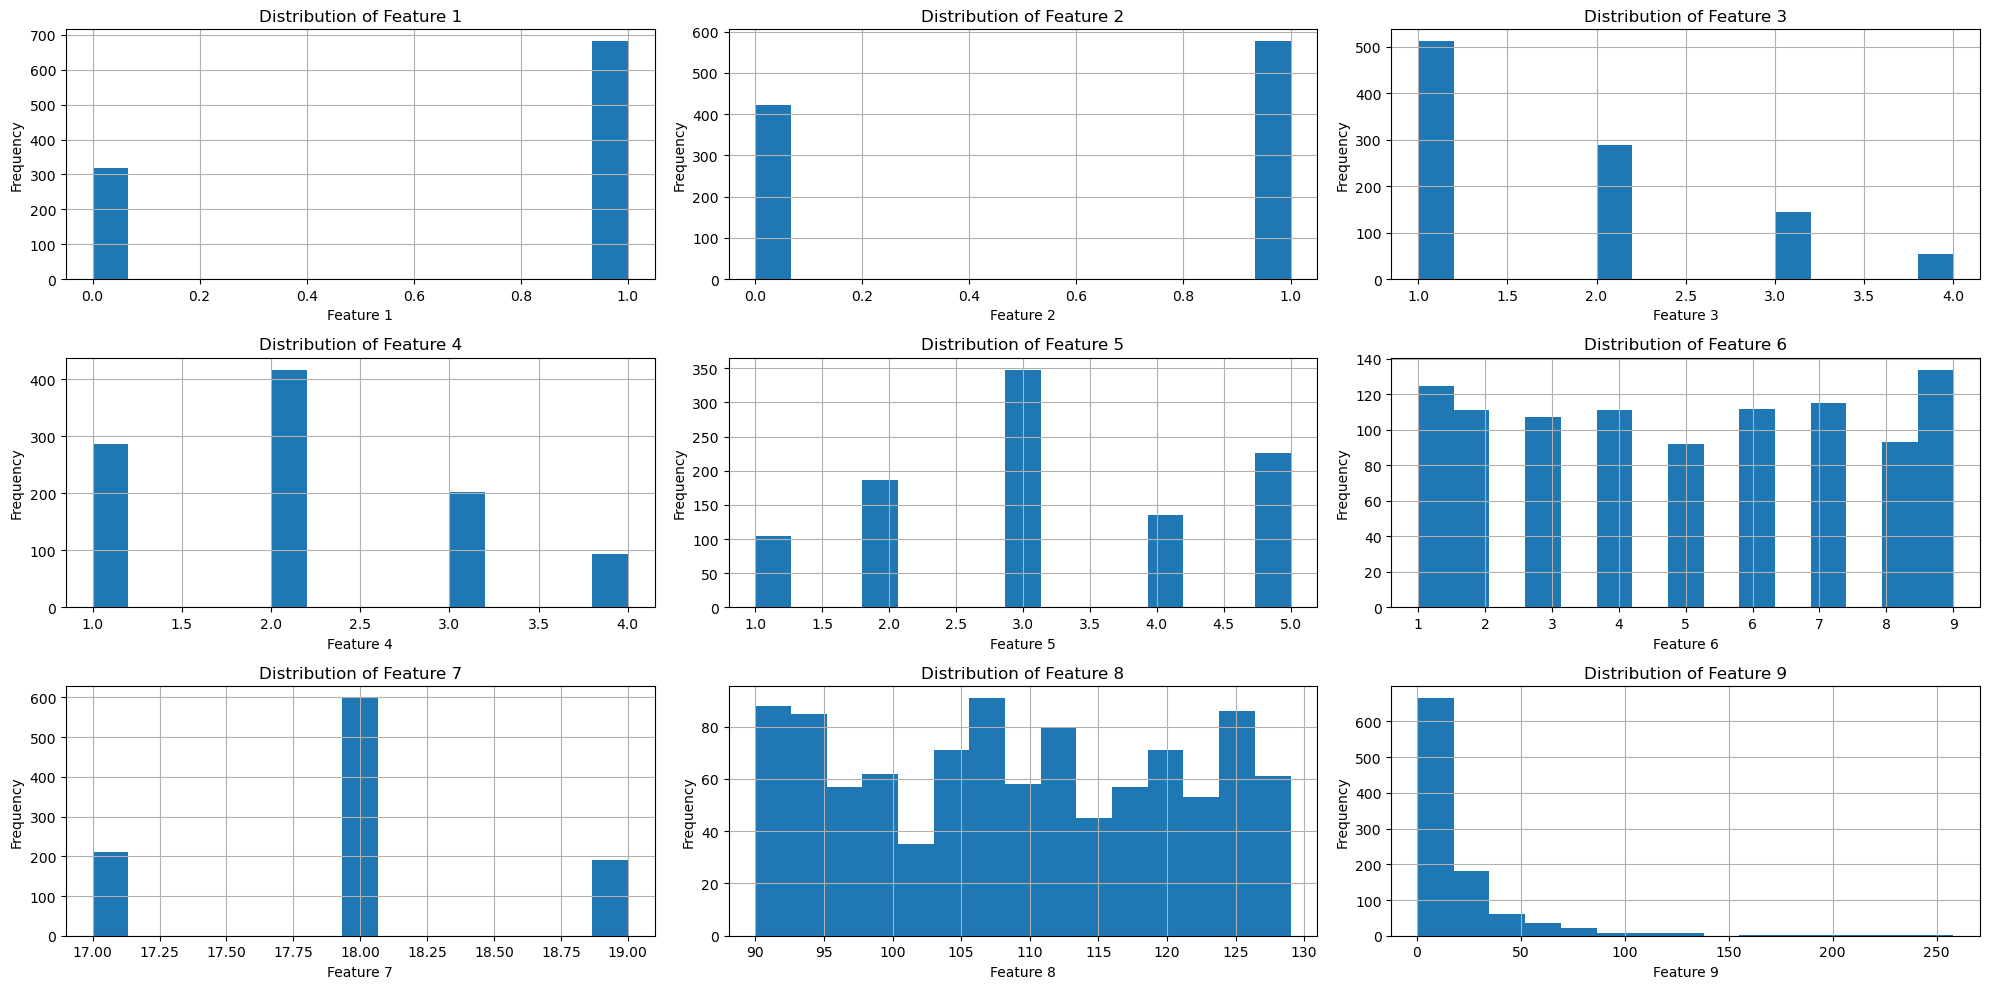

In [184]:
from sklearn.preprocessing import LabelEncoder
def new_feature(x_train):
    product_study_iq = x_train[:, 3] * x_train[:, 7]
    product_3_5_6 = x_train[:, 2] * x_train[:, 4] * x_train[:, 5]
    # Compute the new feature by dividing product_study_iq by product_3_5_6
    new_feature = product_study_iq / product_3_5_6
    x_train = np.column_stack((x_train, new_feature))
    return x_train

def feature_changing(x_train):
    label_encoders = []
    for col_index in range(2):
        label_encoder = LabelEncoder()
        x_train[:, col_index] = label_encoder.fit_transform(x_train[:, col_index])
        label_encoders.append(label_encoder)
    x_train=new_feature(x_train)
    return x_train

x_train= feature_changing(x_train)
print(x_train)
#plotting each feature against y_train to understand relationships (doing again)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))
axes = axes.flatten()
for i in range(x_train.shape[1]):
    axes[i].scatter(x_train[:, i], y_train)
    axes[i].set_xlabel(f'Feature {i+1}')
    axes[i].set_ylabel('y_train')
    axes[i].set_title(f'Feature {i+1} vs y_train')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

# Plot histograms for each feature
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))
axes = axes.flatten()
for i in range(x_train.shape[1]):
    axes[i].hist(x_train[:, i], bins=15)
    axes[i].set_xlabel(f'Feature {i+1}')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Distribution of Feature {i+1}')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

In [185]:
# feature scaling by normalization
def z_score(x_train):
    x_mean = np.mean(x_train, axis=0)
    x_std = np.std(x_train, axis=0)
    x_train_norm = (x_train - x_mean)/x_std
    return x_train_norm,x_std,x_mean
#very similar to the official standard scaler

In [186]:
def cost(x_train,y_train,w,b):
    y_pred = np.dot(x_train, w) + b
    loss = np.mean((y_pred - y_train) ** 2)/2
    return loss

In [187]:
def gradient_descent(x_train,y_train,w,b, learning_rate = 0.005):
    m = len(y_train)
    predictions = np.dot(x_train, w) + b
    errors = predictions - y_train
    dj_dw = (1 / m) * np.dot(x_train.T, errors)
    dj_db = (1 / m) * np.sum(errors)
    w = w - learning_rate * dj_dw
    b = b - learning_rate * dj_db
    return w,b

In [188]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
    old_cost = cost(x_train,y_train,w,b)
    w,b = gradient_descent(x_train,y_train,w,b)

x_predict = pd.read_excel('Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b
accuracy = 0
for dim in range(len(ans)):
    if abs(y_predict[dim]-ans[dim])<0.5:# do not change the tolerance as you'll be checked on +- 0.5 error only
        accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Congratulations, your accuracy is 100.0%
